In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
data245_cleaneddata=pd.read_csv("https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/proj_data245_testing.csv")
# data245_cleaneddata=pd.read_csv("sowmyatesting.csv")
data245_cleaneddata

,Unnamed: 0,state,job_opportunity_rank,affordability,economy,education and health,quality of life,safety,Climate,title,totalyearlycompensation,yearsofexperience,tag,Education
0,0,Alabama,2,0,3,4,4,4,0,Software Engineer,84000,3.0,Full Stack,-1.0
1,1,Alabama,2,0,3,4,4,4,0,Software Engineer,70000,2.0,Full Stack,-1.0
2,2,Alabama,2,0,3,4,4,4,0,Software Engineer,112000,5.0,Linux Kernel,1.0
3,3,Alabama,2,0,3,4,4,4,0,Software Engineer,71000,2.0,Full Stack,-1.0
4,4,Alabama,2,0,3,4,4,4,0,Software Engineer,84000,2.0,Full Stack,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,52241,Wisconsin,1,3,1,0,0,0,4,Software Engineer,105000,0.0,Full Stack,-1.0
52242,52242,Wisconsin,1,3,1,0,0,0,4,Software Engineer,115000,2.0,Full Stack,-1.0
52243,52243,Wisconsin,1,3,1,0,0,0,4,Software Engineer,115000,0.0,Full Stack,-1.0
52244,52244,Wisconsin,1,3,1,0,0,0,4,Software Engineer,188000,8.0,Cloud,-1.0


In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

In [4]:
final_data = pd.get_dummies(data = data245_cleaneddata, columns = ['title',
                                                             'tag'])
df = final_data.loc[ : , final_data.columns != 'state']

target_data=data245_cleaneddata['state']
X = df

In [5]:
df.shape

(52246, 2672)

Text(0, 0.5, 'cumulative explained variance')

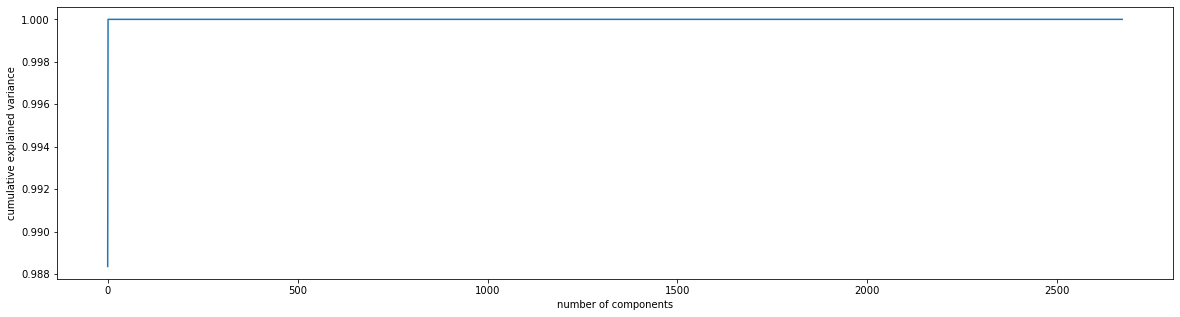

In [6]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [7]:
pca = PCA(n_components=50, random_state=11)  # reduce to two components
pca.fit(X)

PCA(n_components=50, random_state=11)

In [8]:
data = pca.transform(X)
data=pd.DataFrame(data)
data.shape

(52246, 50)

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data,target_data,test_size=0.30,random_state=42)
Ytrain

19949    California
22859    California
17930    California
10458    California
41775    Washington
            ...    
11284    California
44732    Washington
38158         Texas
860      California
15795    California
Name: state, Length: 36572, dtype: object

In [10]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function importing Dataset
def importdata():
	balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
	sep= ',', header = None)
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

# Driver code
def main():
	
	# Building Phase
	#data = importdata()
	Y = target_data
	X = df
	X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
# 	pickle_out=open("DecisionTree_data245.pkl","wb")
# 	pickle.dump(clf_entropy,pickle_out)
# 	pickle_out.close()
	
	# Operational Phase
	print("Results Using Gini Index:")
	
	# Prediction using gini
	y_pred_gini = prediction(X_test, clf_gini)
	cal_accuracy(y_test, y_pred_gini)
	
	print("Results Using Entropy:")
	# Prediction using entropy
	y_pred_entropy = prediction(X_test, clf_entropy)
	cal_accuracy(y_test, y_pred_entropy)
	
	
# Calling main function
if __name__=="__main__":
	main()

Results Using Gini Index:
Predicted values:
['California' 'Washington' 'California' ... 'Washington' 'Texas'
 'California']
Confusion Matrix:  [[   0    0    7 ...    0    0    0]
 [   0  112    0 ...    0    0    0]
 [   0    0   37 ...    0    0    0]
 ...
 [   0    0    0 ... 3706    0    0]
 [   0    0    0 ...    0    0    3]
 [   0    0    0 ...    0    0   46]]
Accuracy :  83.10578027306367


/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                  precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         7
       Arizona       1.00      1.00      1.00       112
      Arkansas       0.84      1.00      0.91        37
    California       1.00      1.00      1.00      6853
      Colorado       0.00      0.00      0.00       159
   Connecticut       0.00      0.00      0.00        31
      Delaware       0.00      0.00      0.00        20
       Florida       0.00      0.00      0.00        72
       Georgia       0.00      0.00      0.00       165
         Idaho       0.00      0.00      0.00        16
      Illinois       0.00      0.00      0.00       241
       Indiana       0.00      0.00      0.00        32
          Iowa       0.00      0.00      0.00         7
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         6
     Louisiana       0.00      0.00      0.00         8
         Maine       0.00      0.00  

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                  precision    recall  f1-score   support

       Alabama       0.00      0.00      0.00         7
       Arizona       0.00      0.00      0.00       112
      Arkansas       0.00      0.00      0.00        37
    California       1.00      1.00      1.00      6853
      Colorado       0.00      0.00      0.00       159
   Connecticut       1.00      1.00      1.00        31
      Delaware       0.00      0.00      0.00        20
       Florida       0.00      0.00      0.00        72
       Georgia       0.35      1.00      0.52       165
         Idaho       0.00      0.00      0.00        16
      Illinois       0.59      1.00      0.74       241
       Indiana       0.00      0.00      0.00        32
          Iowa       0.00      0.00      0.00         7
        Kansas       0.00      0.00      0.00        11
      Kentucky       0.00      0.00      0.00         6
     Louisiana       0.00      0.00      0.00         8
         Maine       0.00      0.00  

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

rnd_clf = RandomForestClassifier(n_estimators=16, max_leaf_nodes=60, random_state=70,criterion='gini')
rnd_clf.fit(Xtrain, Ytrain)

y_pred_rf = rnd_clf.predict(Xtest)
print(accuracy_score(Ytest, y_pred_rf))
y_pred_rf

0.9924078091106291


array(['California', 'Washington', 'California', ..., 'Washington',
       'Colorado', 'California'], dtype=object)

In [12]:
import pickle
pickle_out=open("RandomForest_data245.pkl","wb")
pickle.dump(rnd_clf,pickle_out)
pickle_out.close()

In [13]:
import numpy as np
np.unique(y_pred_rf)

array(['Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Nevada', 'New Hampshire', 'New Jersey', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'Wisconsin'], dtype=object)

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
from sklearn.decomposition import PCA

In [15]:
# fit model no training data
XGB_clf = XGBClassifier()
XGB_clf.fit(Xtrain, Ytrain)
# make predictions for test data
y_pred_XG = XGB_clf.predict(Xtest)
print(accuracy_score(Ytest, y_pred_XG))
y_pred_XG

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9988516013780784


array(['California', 'Washington', 'California', ..., 'Washington',
       'Colorado', 'California'], dtype=object)

In [16]:
np.unique(y_pred_XG)

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [21]:
import pickle
pickle_out=open("s_XGBoost_data245.pkl","wb")
pickle.dump(XGB_clf,pickle_out)
pickle_out.close()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(XGBClassifier())
#Xtrain,Xtest,Ytrain,Ytest
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(Xtrain, Ytrain)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(Xtrain.iloc[train, :], Ytrain.iloc[train])
    score = pipeline.score(Xtrain.iloc[test, :], Ytrain.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: , Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/sowmya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1, Training/Test Split Distribution: , Accuracy: 0.999
[16:11:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  2, Training/Test Split Distribution: , Accuracy: 1.000
[16:12:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  3, Training/Test Spl

In [23]:
pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /private/var/folders/gf/7qz7pmws6zl3cxyfck9n1j7m0000gn/T/pip-req-build-yhirmgzg
  Running command git clone --filter=blob:none -q https://github.com/slundberg/shap.git /private/var/folders/gf/7qz7pmws6zl3cxyfck9n1j7m0000gn/T/pip-req-build-yhirmgzg
  Resolved https://github.com/slundberg/shap.git to commit 429fb3e0ac2ef179f1cff7e1a64b4f7b26f41eb5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing wheel metadata (pyproject.toml) ... done
     |████████████████████████████████| 40 kB 2.7 MB/s             
  Created wheel for shap: filename=shap-0.40.0-cp38-cp38-macosx_10_9_x86_64.whl size=433628 sha256=89eb0ca9763ee0d8c57390e338a48bc49e6d0ef863e09e9db0ea5dbb9d13126a
  Stored in directory: /private/var/folders/gf/7qz7pmws6zl3cxyfck9n1j7m0000gn/T/pip-ephem-wheel-cache-6e_p4qpb/wheels/43/d4/b7/852c8c4711da053ae2ad230f1a8b270ca2ad3fc26ab00b1a03
Successfully built shap
  Attempting uninstall: pa

In [ ]:
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train_pca, Ytrain)

# #Predict the response for test dataset
# y_pred_rf = clf.predict(X_test_pca)
# print(accuracy_score(Ytest, y_pred_rf))
# y_pred_rf

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# ada_clf = AdaBoostClassifier(n_estimators=4,
#      learning_rate=0.5)
# ada_clf.fit(Xtrain, Ytrain)
# y_pred = ada_clf.predict(Xtest)
# print(accuracy_score(Ytest, y_pred))
# np.unique(y_pred)